In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
data_dir=os.path.join(data_dir,'flower_photos')
data_dir

'datasets/flower_photos/flower_photos'

In [9]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [11]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [12]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4684127262_6c3346188d.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15032112248_30c5284e54_n.jpg')]

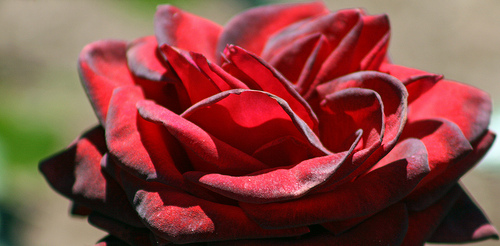

In [19]:
PIL.Image.open(str(roses[1]))

In [20]:
tulips=list(data_dir.glob('tulips/*'))

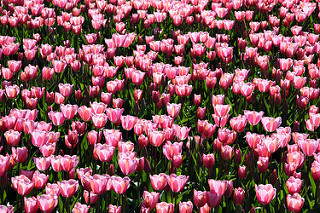

In [23]:
PIL.Image.open(str(tulips[3]))

In [28]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [30]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/flower_photos/roses/5212885371_fe27c406a2_n.jpg')

array([[[ 64,  93, 167],
        [ 58,  88, 159],
        [ 61,  89, 160],
        ...,
        [  6, 115, 177],
        [ 20,  99, 166],
        [ 37,  31, 113]],

       [[ 61,  89, 160],
        [ 59,  88, 157],
        [ 64,  90, 160],
        ...,
        [ 22, 122, 186],
        [ 12,  77, 146],
        [ 28,  29, 110]],

       [[ 58,  85, 152],
        [ 62,  88, 155],
        [ 64,  90, 156],
        ...,
        [ 25, 111, 177],
        [ 12,  51, 126],
        [ 18,  29, 109]],

       ...,

       [[  0, 138, 203],
        [  0, 131, 199],
        [  1, 118, 193],
        ...,
        [ 11,  53, 172],
        [ 10,  53, 170],
        [  7,  50, 167]],

       [[ 13, 126, 199],
        [ 10, 110, 188],
        [  9,  90, 175],
        ...,
        [ 14,  51, 171],
        [ 12,  47, 167],
        [ 10,  45, 165]],

       [[  3, 111, 189],
        [  0,  90, 173],
        [  0,  68, 159],
        ...,
        [ 13,  46, 169],
        [ 12,  43, 164],
        [ 12,  43, 164]]], dtype=uint8)
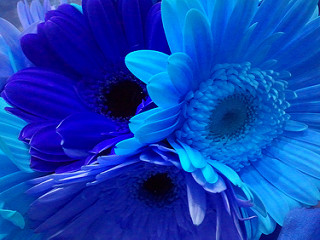

In [33]:
img=cv2.imread(flowers_images_dict['roses'][0])
img

In [34]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [35]:
X,y=[],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [36]:
X=np.array(X)
y=np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=0)

In [38]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [40]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 927ms/step - accuracy: 0.3905 - loss: 1.4602
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 917ms/step - accuracy: 0.6027 - loss: 0.9923
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 965ms/step - accuracy: 0.6875 - loss: 0.8203
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 931ms/step - accuracy: 0.7875 - loss: 0.5876
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 921ms/step - accuracy: 0.8568 - loss: 0.3982
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 914ms/step - accuracy: 0.9215 - loss: 0.2397
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 920ms/step - accuracy: 0.9679 - loss: 0.1183
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 927ms/step - accuracy: 0.9701 - loss: 0.1104
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 925ms/step - accuracy: 0.9914 - loss: 0.0391
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 941ms/step - accuracy: 0.9979 - loss: 0.0148


In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.6520 - loss: 1.8577


[1.9248700141906738, 0.6590414047241211]

Data Augmentation to tackle overfitting

In [43]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3224 - loss: 1.6765
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5487 - loss: 1.1191
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6035 - loss: 0.9719
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6444 - loss: 0.8884
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6808 - loss: 0.8211
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7013 - loss: 0.7750
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7190 - loss: 0.7275
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7284 - loss: 0.6892
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7398 - loss: 0.6949
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7398 - loss: 0.6313


In [45]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.7173 - loss: 0.7632


[0.7569782733917236, 0.7320261597633362]